In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\debas\Downloads\laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2]:
df.shape

(1303, 12)

In [3]:
#missing values
print(df.isnull().sum())
#duplicate values
print("no of duplicate values",df.duplicated().sum())

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
no of duplicate values 0


# DATA PREPROCESSING

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True )

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.rename(columns={'Ram':"RAM","Cpu":'CPU','Gpu':'GPU'},inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   CPU               1303 non-null   object 
 5   RAM               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   GPU               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   CPU               1303 non-null   object 
 5   RAM               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   GPU               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA

In [9]:
import seaborn as sns

C:\Users\debas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

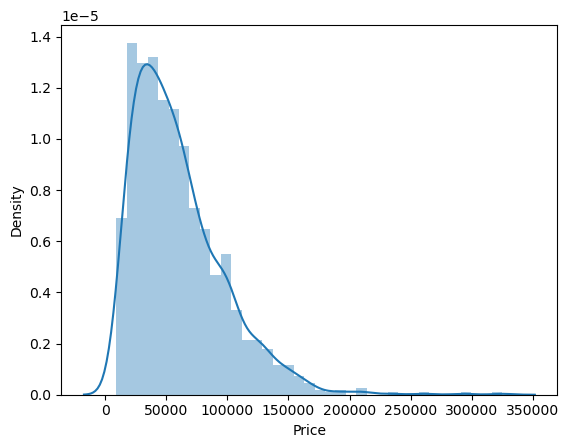

In [10]:
sns.distplot(df['Price'])

We, can see that the data is right skewed data. this is obvious because most of laptop are comparatively have low price range and very few are highlu priced as most people cannot afford these laptops

# BRANDS

<AxesSubplot:>

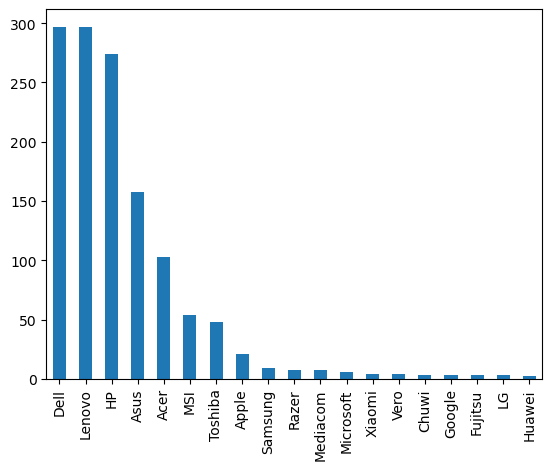

In [11]:
#********BRANDS*********
# Most sold laptop companies
df['Company'].value_counts().plot(kind='bar')
#plt.bar(df['TypeName'],df['Price'])

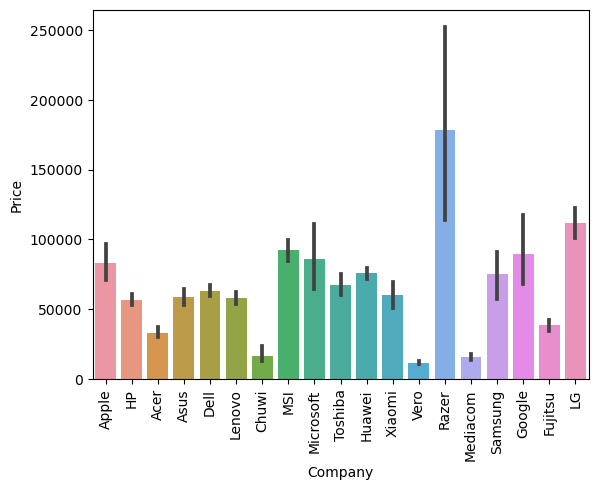

In [12]:
#********BRANDS*********
#average price of laptop for each brand
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# TYPENAME

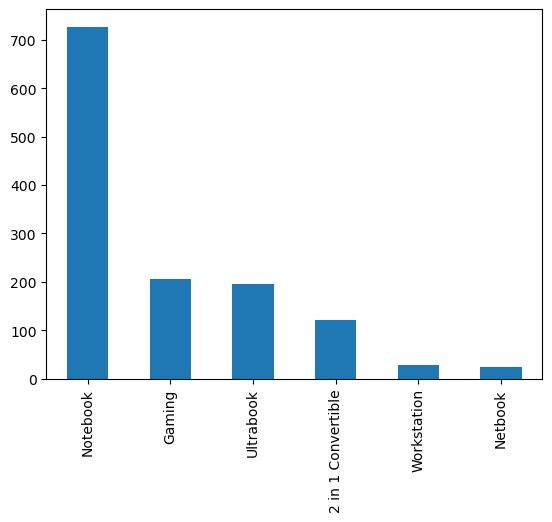

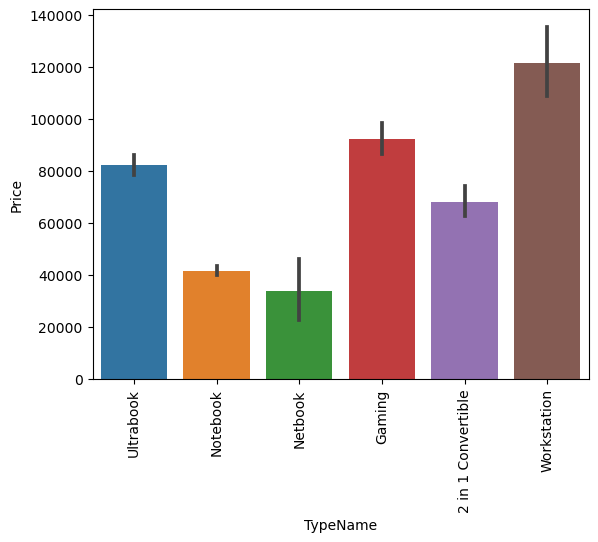

In [13]:
#********TYPENAME*********
df['TypeName'].value_counts().plot(kind='bar')
plt.show()
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

 suggesting that most of people buy notebook that are cheap and affordable for population for study purpose

# LAPTOP DISPLAY SIZE

In [14]:
#********LAPTOP DISPLAY SIZE*********
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<BarContainer object of 1303 artists>

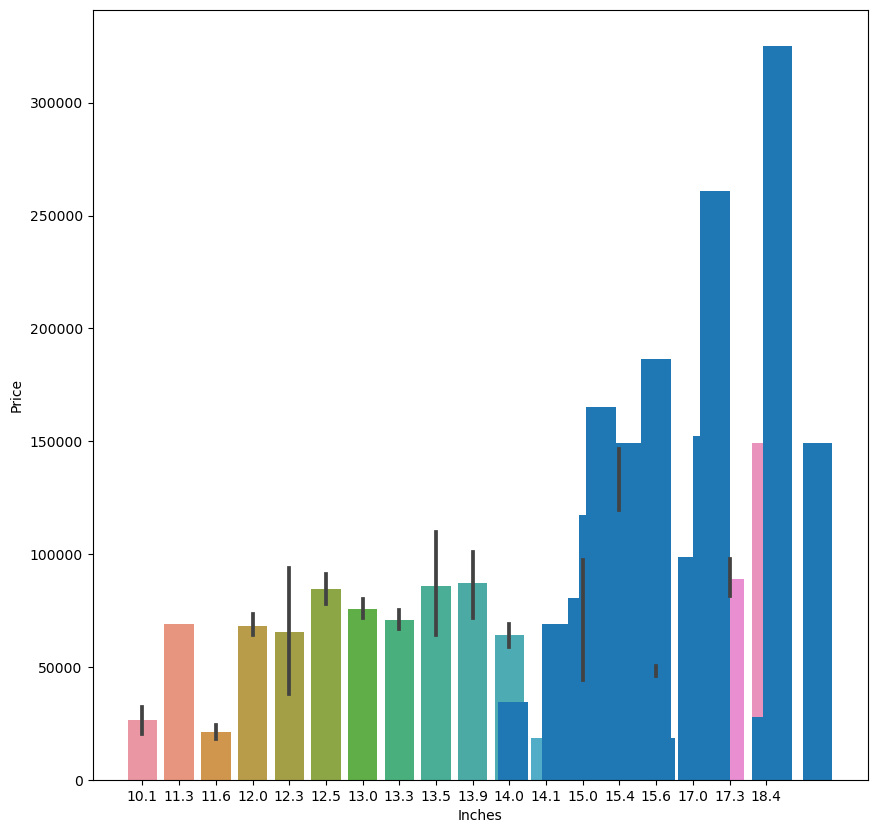

In [15]:
#********LAPTOP DISPLAY SIZE*********
plt.figure(figsize=(10,10))
sns.barplot(x=df['Inches'],y=df['Price'])
plt.bar(df['Inches'],df['Price'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

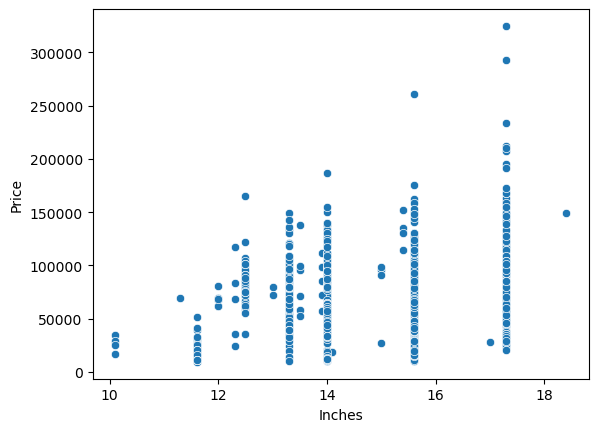

In [16]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

the price of the laptop doesnot seem to be strongly correlated with screen size but it is correlated but not strong enough.i.e with increase in screen size the price increases to some extent but not always

# SCREEN RESOLUTION

In [17]:
#*********SCREEN RESOLUTION*******
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
#here, we canm observe that the screen resolution contains an important feature that whether it is a touch screen or not, so by feature engineering we will extract this feature
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
 df.sample(5)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316.000,0
881,HP,2 in 1 Convertible,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.30,36486.144,1
254,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.560,0
420,Lenovo,2 in 1 Convertible,15.6,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,101178.720,1
849,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.54,78215.040,0


In [20]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

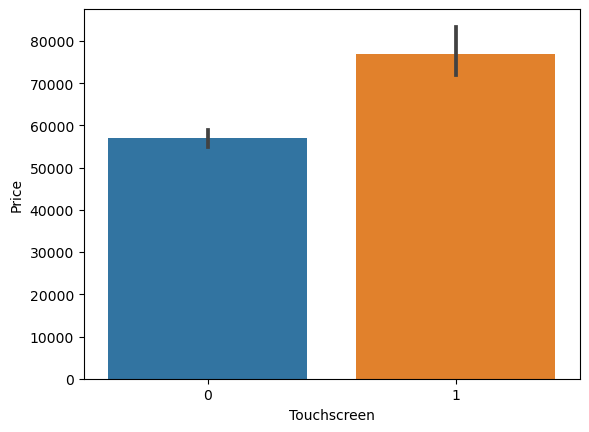

In [21]:
#to see if there is a difference in price based on the feature touchscreen
sns.barplot(df['Touchscreen'],df['Price'])

clearly , there is a diffferent in price base on touch screen feature. the laptops with touch screen has a higher price

In [22]:
# now also the screen resolution feature contains another feature hiding inside these column IPS
#WE SHALL EXTRACT THSE FEATURE AND SEE IF THERE IS SOME RELATION WITH PRICE
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS
405,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,99793.44,0,0
845,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.92,0,0
651,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,37775.52,0,0
82,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.63,45820.80,0,0
1084,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,39960.00,0,0


In [23]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='Price'>

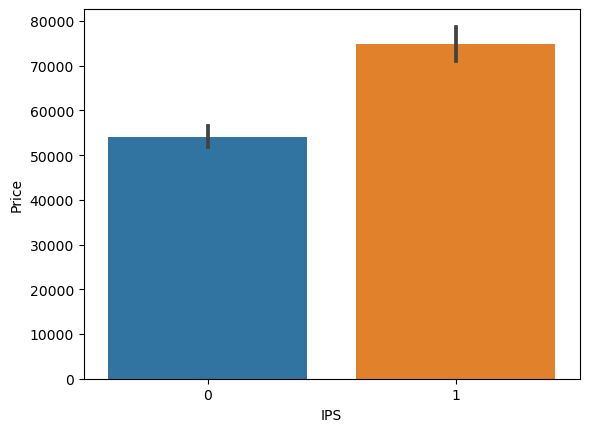

In [24]:
#to see if there is a difference in price based on the feature touchscreen
sns.barplot(df['IPS'],df['Price'])

clearly , there is a difference in price base on IPS feature. the laptops with IPS has a higher price

In [25]:
#here we have to see the resolution feature also contains the x and y resolution size, which need to be extracted as later we will se later
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18061.92,0,0,1366,768
116,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.52,0,0,Full HD 1920,1080
584,Dell,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,15717.60,0,0,1366,768
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.72,0,0,Full HD 1920,1080
123,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,67718.88,0,0,Full HD 1920,1080


In [26]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   CPU               1303 non-null   object 
 5   RAM               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   GPU               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [29]:
df.corr()['Price']

Inches         0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [30]:
# clearly, x and y resolutions are clearly correlated to each other 
# they have corelation with each other also so we will combine these 2 resolutions along with inches to form ppi
# PIXELS PER INCHES (PPI) 
df['PPI']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [31]:
df.corr()['Price']

Inches         0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [32]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [33]:
df.head()

,Company,TypeName,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# CPU

In [34]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: CPU, Length: 118, dtype: int64

In [35]:
#see here predominantly we have intel cores , so we will make 5 categories
# intel i5
#intel i7
#intel i3
#other intel processor
# amd or other nmon intel ones
df['Cpu Name'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3])) #spliiting based on space and taking the first 3 words
df.head()

,Company,TypeName,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [36]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,CPU,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [38]:
df['Cpu brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu brand, dtype: int64

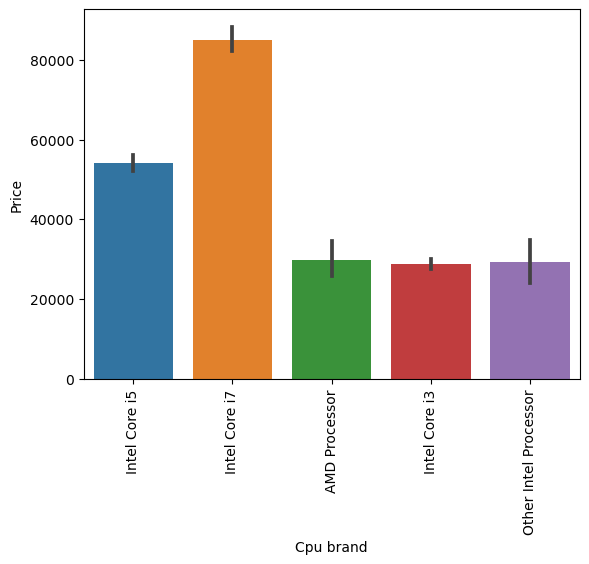

In [39]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

with the increase of the intel procesor the price increases. howeve there is small difference(almost similar) in price in i3 , or other old  intel products and the the other AMD products

In [40]:
df.drop(columns=['CPU','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# RAM

<AxesSubplot:>

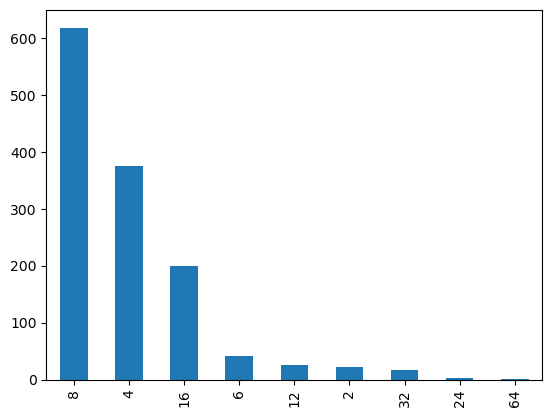

In [41]:
df["RAM"].value_counts().plot(kind='bar')

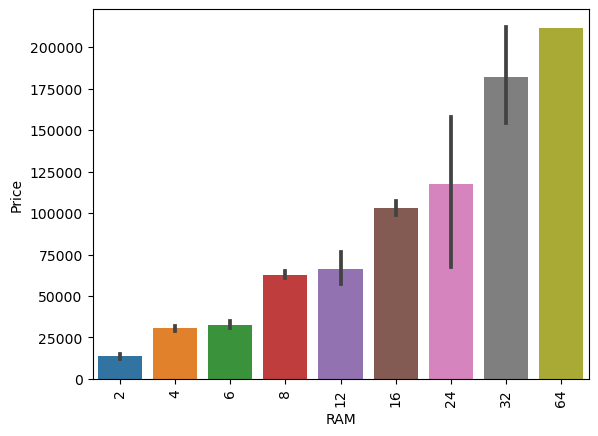

In [42]:
sns.barplot(x=df['RAM'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

cLEARLY price increase with increase in RAM size

# Memory

In [43]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [44]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\debas\AppData\Local\Temp\ipykernel_25136\2350634652.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\debas\AppData\Local\Temp\ipykernel_25136\2350634652.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [45]:
df.sample(5)

,Company,TypeName,RAM,Memory,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
282,Lenovo,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.1200,0,1,141.211998,Intel Core i5,0,256,0,0
1034,HP,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.84,65480.5872,0,0,141.211998,Intel Core i7,0,256,0,0
452,HP,Workstation,8,512 SSD,Intel HD Graphics 620,Windows 10,2.31,81731.5200,0,1,141.211998,Intel Core i7,0,512,0,0
880,HP,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 620,Windows 10,1.28,90576.0000,1,0,165.632118,Intel Core i5,0,256,0,0
58,MSI,Gaming,16,256 SSD + 2000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,130482.7200,0,0,127.335675,Intel Core i7,2000,256,0,0


In [46]:
df.drop(columns='Memory',inplace=True)

In [47]:
df.corr()['Price']

RAM              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

has very low negative correlation with HDD and flash storage but a very high correlation with  

# Graphical Processing Unit(GPU)

In [48]:
df['GPU'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

here since dataset is less or else we could make each GPU name as category but here we neither the memory og GPU, so we are left with only the option of grouping them in terms of brand 

In [49]:
df['Gpu brand'] = df['GPU'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,RAM,GPU,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [50]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [51]:
df=df[df['Gpu brand']!='ARM']

In [52]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

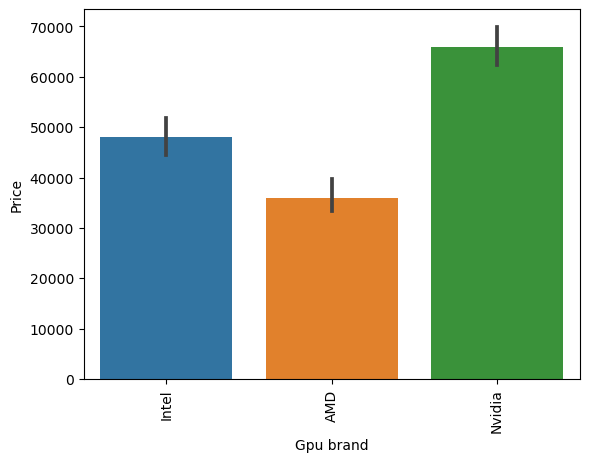

In [53]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
#here we have taken median bcz intel has some expensive GPU so it increases the average so we have taken the median
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(columns=['GPU'],inplace=True)

# oPERATING sYSTEM

In [55]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [56]:
# so many categories , so we combine them based on company
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [57]:
df['os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,RAM,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [58]:
df.drop(columns=['OpSys'],inplace=True)

In [59]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

# Weights

C:\Users\debas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

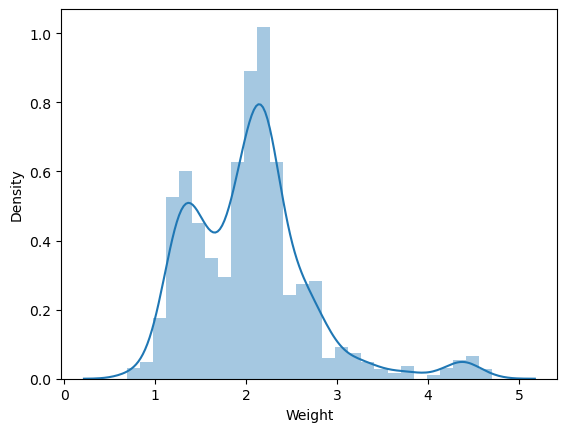

In [60]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

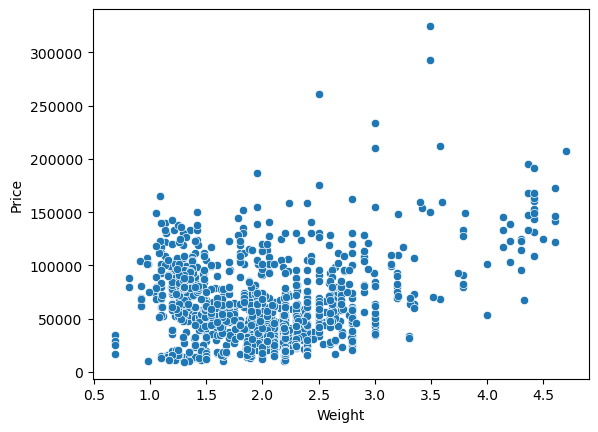

In [61]:
 sns.scatterplot(x=df['Weight'],y=df['Price'])

In [62]:
df.corr()['Price']

RAM              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

# verry slightly correlated

In [63]:
# to understand all the correlation between columns

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

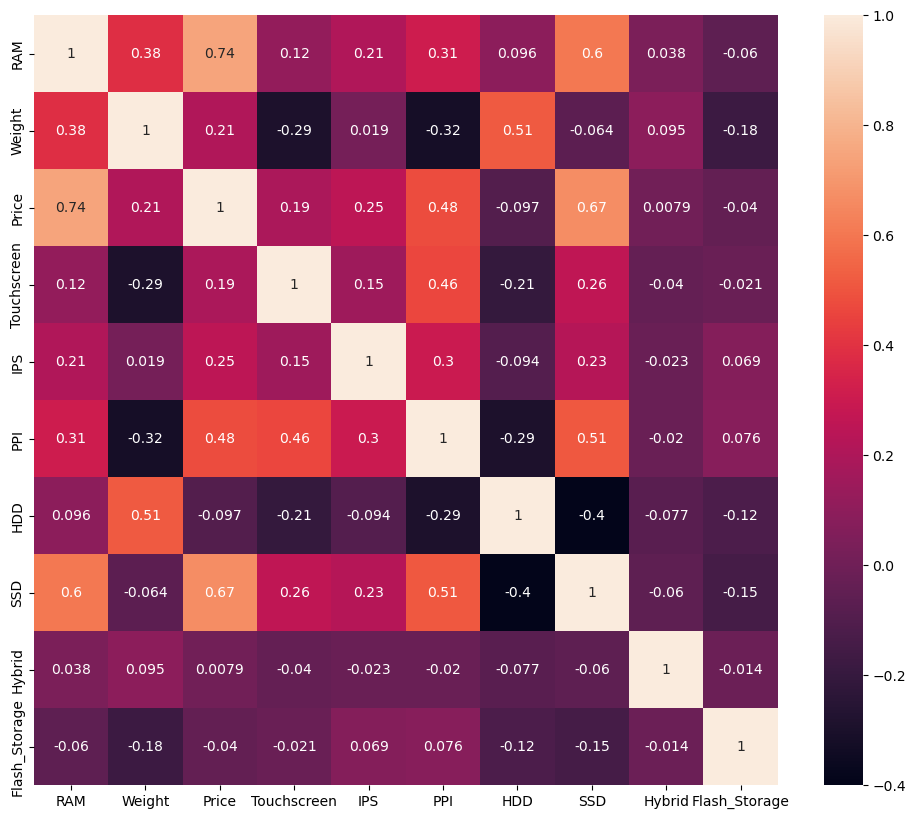

In [64]:
plt.figure( figsize = (12,10) )
sns.heatmap( df.corr(), annot = True );
plt.title

C:\Users\debas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

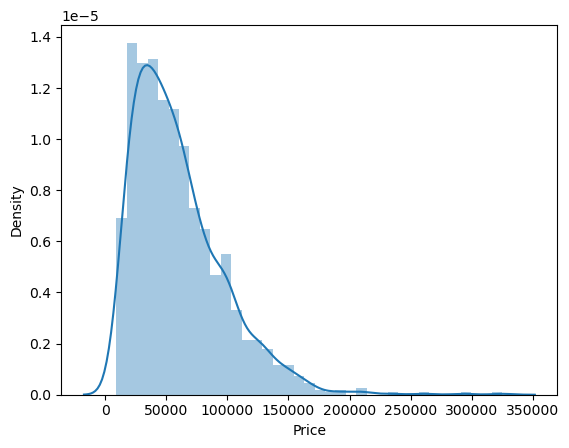

In [65]:
sns.distplot(df['Price'])

C:\Users\debas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

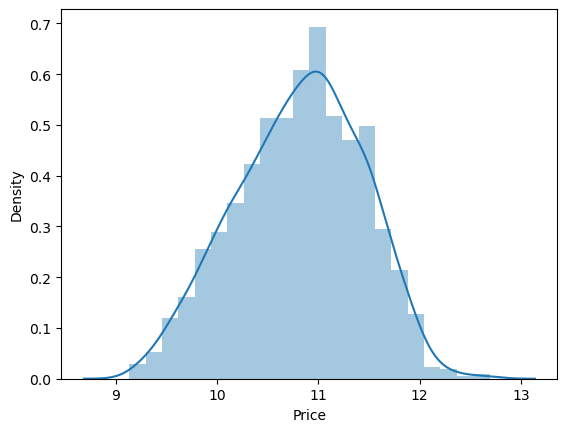

In [66]:
sns.distplot(np.log(df['Price']))

In [67]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [68]:
one_hot_encoded_data = pd.get_dummies(X, columns = ['Company', 'TypeName', "Cpu brand", 'Gpu brand','os'],drop_first=True)
X1=one_hot_encoded_data
X1

,RAM,Weight,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage,Company_Apple,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,0,0,0,128,1,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,0,1,226.983005,0,256,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1300,2,1.50,0,0,111.935204,0,0,0,64,0,...,0,0,0,0,0,1,1,0,0,1
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [69]:
#testimg
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_features=X #(will be used later, since it gets changed in sm.addconstant)
X2=sm.add_constant(X1)

train_x,test_x,train_y,test_y=train_test_split(X2,y,train_size=0.8,random_state=42)
model1=sm.OLS(train_y,train_x).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                   Adj. R-squared:          0.831   
Dependent Variable:      Price                 AIC:                     165.6162
Date:                    2023-12-05 10:57      BIC:                     363.5337
No. Observations:        1041                  Log-Likelihood:          -42.808 
Df Model:                39                    F-statistic:             131.7   
Df Residuals:            1001                  Prob (F-statistic):      0.00    
R-squared:               0.837                 Scale:                   0.066109
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            7.2183   0.0657 109.9102 0.0000  7.0894  7.3471
RAM                              0.0241   0.0027   8.9974 0.0000  0.0188  0.0293
Weight                           0.0871   0.0218   3.9961 0.0001  0.0443  0.1298
Touchscreen                     -0.1096   0.0417  -2.6299 0.0087 -0.1915 -0.0278
IPS                              0.0543   0.0215   2.5228 0.0118  0.0121  0.0965
PPI                              0.0024   0.0003   8.5449 0.0000  0.0018  0.0029
HDD                              0.0000   0.0000   0.7793 0.4360 -0.0000  0.0001
SSD                              0.0007   0.0001   8.9178 0.0000  0.0005  0.0009
Hybrid                           0.0001   0.0001   0.9209 0.3573 -0.0001  0.0002
Flash_Storage                    0.0008   0.0003   2.6316 0.0086  0.0002  0.0015
Company_Apple                    2.6217   0.0654  40.0898 0.0000  2.4934  2.7501
Company_Asus                     0.0938   0.0393   2.3847 0.0173  0.0166  0.1709
Company_Chuwi                   -0.3615   0.1552  -2.3293 0.0200 -0.6660 -0.0569
Company_Dell                     0.1559   0.0372   4.1911 0.0000  0.0829  0.2289
Company_Fujitsu                 -0.0422   0.1857  -0.2273 0.8202 -0.4067  0.3223
Company_Google                   0.4662   0.1594   2.9247 0.0035  0.1534  0.7789
Company_HP                       0.1967   0.0360   5.4564 0.0000  0.1259  0.2674
Company_Huawei                  -0.0321   0.2612  -0.1231 0.9021 -0.5446  0.4804
Company_LG                       0.4354   0.1569   2.7750 0.0056  0.1275  0.7432
Company_Lenovo                   0.1048   0.0348   3.0107 0.0027  0.0365  0.1731
Company_MSI                      0.2369   0.0582   4.0718 0.0001  0.1227  0.3511
Company_Mediacom                -0.3415   0.1228  -2.7815 0.0055 -0.5824 -0.1006
Company_Microsoft                0.4656   0.1383   3.3667 0.0008  0.1942  0.7369
Company_Razer                    0.3052   0.1376   2.2176 0.0268  0.0351  0.5752
Company_Samsung                  0.3880   0.1054   3.6819 0.0002  0.1812  0.5947
Company_Toshiba                  0.2914   0.0527   5.5322 0.0000  0.1880  0.3947
Company_Vero                    -0.5177   0.1353  -3.8276 0.0001 -0.7831 -0.2523
Company_Xiaomi                   0.1129   0.1870   0.6036 0.5462 -0.2540  0.4797
TypeName_Gaming                 -0.0523   0.0628  -0.8325 0.4053 -0.1756  0.0710
TypeName_Netbook                -0.2287   0.0733  -3.1195 0.0019 -0.3726 -0.0849
TypeName_Notebook               -0.2575   0.0500  -5.1537 0.0000 -0.3555 -0.1594
TypeName_Ultrabook               0.0122   0.0483   0.2526 0.8007 -0.0825  0.1069
TypeName_Workstation             0.4073   0.0795   5.1231 0.0000  0.2513  0.5633
Cpu brand_Intel Core i3          0.0808   0.0535   1.5087 0.1317 -0.0243  0.1859
Cpu brand_Intel Core i5          0.3859   0.0499   7.7336 0.0000  0.2880  0.4838
Cpu brand_Intel Core i7          0.4289   0.0498   8.6074 0.0000  0.3311  0.5267
Cpu brand_Other Intel Processor -0.1755   0.0570  -3.0778 0.0021 -0.2874 -0.0636
Gpu bra

<Figure size 800x600 with 0 Axes>

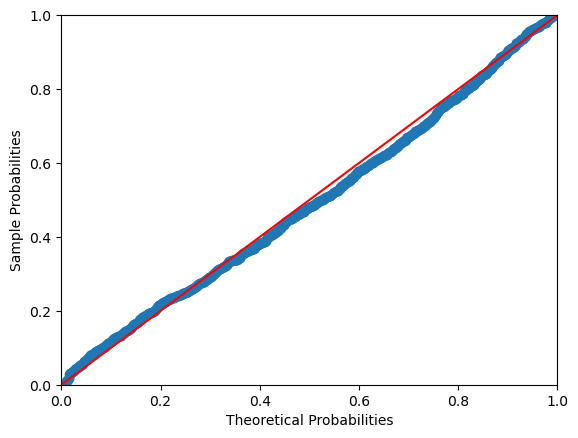

In [72]:
residue1=model1.resid
probplot=sm.ProbPlot(residue1,fit='True')
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

In [75]:
significant_p= ['RAM','Weight','Touchscreen','IPS','PPI','SSD','Flash_Storage','Company_Apple','Company_Asus','Company_Chuwi','Company_Dell','Company_Google','Company_HP','Company_LG','Company_Lenovo','Company_MSI','Company_Mediacom','Company_Microsoft','Company_Razer','Company_Samsung','Company_Toshiba','Company_Vero','TypeName_Netbook','TypeName_Notebook','TypeName_Workstation','Cpu brand_Intel Core i5','Cpu brand_Intel Core i7','Cpu brand_Other Intel Processor','Gpu brand_Intel','Gpu brand_Nvidia','os_Others/No OS/Linux','os_Windows']
train_x=train_x[significant_p]
model2=sm.OLS(train_y,train_x).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                   Adj. R-squared:          0.831   
Dependent Variable:      Price                 AIC:                     155.3763
Date:                    2023-12-05 11:14      BIC:                     313.7103
No. Observations:        1041                  Log-Likelihood:          -45.688 
Df Model:                31                    F-statistic:             166.0   
Df Residuals:            1009                  Prob (F-statistic):      0.00    
R-squared:               0.836                 Scale:                   0.065949
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
RAM                              0.0243   0.0026   9.4346 0.0000  0.0193  0.0294
Weight                           0.0766   0.0188   4.0644 0.0001  0.0396  0.1135
Touchscreen                     -0.1047   0.0294  -3.5603 0.0004 -0.1624 -0.0470
IPS                              0.0552   0.0212   2.5998 0.0095  0.0135  0.0968
PPI                              0.0024   0.0003   8.7530 0.0000  0.0018  0.0029
SSD                              0.0007   0.0001  10.0298 0.0000  0.0005  0.0008
Flash_Storage                    0.0008   0.0003   2.5012 0.0125  0.0002  0.0014
Company_Apple                    9.9202   0.1015  97.7111 0.0000  9.7210 10.1194
Company_Asus                     0.0882   0.0381   2.3151 0.0208  0.0134  0.1630
Company_Chuwi                   -0.3723   0.1546  -2.4088 0.0162 -0.6756 -0.0690
Company_Dell                     0.1638   0.0355   4.6124 0.0000  0.0941  0.2335
Company_Google                   0.4675   0.1564   2.9897 0.0029  0.1607  0.7744
Company_HP                       0.1952   0.0350   5.5739 0.0000  0.1265  0.2640
Company_LG                       0.4436   0.1541   2.8784 0.0041  0.1412  0.7460
Company_Lenovo                   0.1041   0.0336   3.0969 0.0020  0.0381  0.1701
Company_MSI                      0.2208   0.0539   4.0965 0.0000  0.1150  0.3266
Company_Mediacom                -0.3555   0.1220  -2.9144 0.0036 -0.5948 -0.1161
Company_Microsoft                0.4738   0.1345   3.5228 0.0004  0.2099  0.7377
Company_Razer                    0.2828   0.1353   2.0899 0.0369  0.0173  0.5483
Company_Samsung                  0.3959   0.1045   3.7871 0.0002  0.1908  0.6011
Company_Toshiba                  0.2882   0.0516   5.5839 0.0000  0.1869  0.3895
Company_Vero                    -0.5337   0.1344  -3.9703 0.0001 -0.7975 -0.2699
TypeName_Netbook                -0.2244   0.0620  -3.6188 0.0003 -0.3461 -0.1027
TypeName_Notebook               -0.2377   0.0238 -10.0036 0.0000 -0.2843 -0.1911
TypeName_Workstation             0.4288   0.0620   6.9126 0.0000  0.3071  0.5505
Cpu brand_Intel Core i5          0.3226   0.0268  12.0209 0.0000  0.2699  0.3753
Cpu brand_Intel Core i7          0.3740   0.0301  12.4229 0.0000  0.3149  0.4331
Cpu brand_Other Intel Processor -0.2441   0.0362  -6.7499 0.0000 -0.3151 -0.1732
Gpu brand_Intel                  0.1069   0.0276   3.8779 0.0001  0.0528  0.1610
Gpu brand_Nvidia                 0.0912   0.0310   2.9395 0.0034  0.0303  0.1521
os_Others/No OS/Linux            9.4699   0.0735 128.8171 0.0000  9.3256  9.6142
os_Windows                       9.6849   0.0717 135.1287 0.0000  9.5443  9.8256
--------------------------------------------------------------------------------
Omnibus:                   36.853            Durbin-Watson:               1.853 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            53.288
Skew:                      0.331             Prob(JB):                    0.000 
Kurtosis:                  3.889             Condition No.:               6348  
=======